In [241]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
import os

#### Using fft.dct

In [216]:
from scipy import fft
test = fft.dct([1, 2, 3, 4], 2, norm='ortho') # Use SciPy

In [217]:
test

array([ 5.        , -2.2304425 ,  0.        , -0.15851267])

#### Build 1D-DCT II Function

In [218]:
def dct(data):
    N = len(data)
    f = 0
    cof = np.zeros(N)
    for k in range(N):
        if k==0:
            f = math.sqrt(1/(4*N))
        else:
            f = math.sqrt(1/(2*N))

        s = 0
        for n in range(N):
            out = data[n] * math.cos((math.pi*k) / (2*N) * (2*n+1))
            s = s + out
        cof[k] = 2 * f * s
        
    return np.around(cof, decimals=7)

In [219]:
data = np.array([1,2, 3, 4])
data

array([1, 2, 3, 4])

In [220]:
output = dct(data)
output

array([ 5.       , -2.2304425, -0.       , -0.1585127])

#### Data-1D -> Signal 

In [221]:
data1D = np.random.randint(256, size=64)
data1D

array([ 36, 189, 165,   5, 221, 158,  11, 211, 195, 125, 174, 142, 200,
       192,  12, 143,  81, 245,  42, 125, 216,  85, 237, 137, 106,  23,
       186,  96, 140,   6, 179, 212, 167, 122, 143, 119, 247,  14, 179,
       106, 112,  21,  86,  47,   7, 157, 221,  47, 243, 193,  71,  40,
       191, 171,  76, 111, 176, 106, 163,  53, 223, 142, 101, 190])

In [222]:
N1D = len(data1D)
index1D = np.arange(N1D)
index1D

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

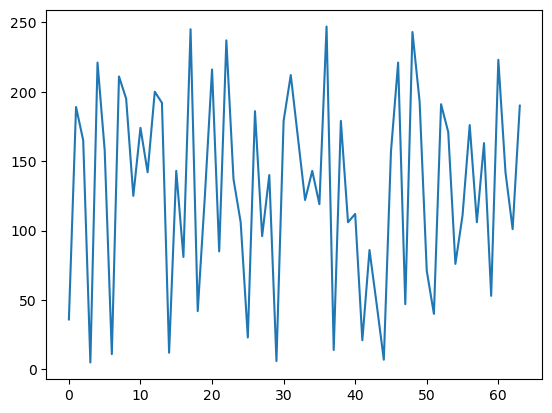

In [223]:
plt.plot(index1D, data1D)

In [224]:
output1D = dct(data1D)
output1D

array([ 1.04250000e+03,  2.32191923e+01,  3.76867601e+01, -6.60336037e+01,
        1.36053355e+01, -2.19510241e+01, -8.02841646e+01, -6.55965620e+00,
        4.11764146e+01, -1.29768940e+02, -1.30210799e+01,  7.85503682e+01,
        9.45473320e+00,  4.47269829e+01,  2.62432090e+00, -8.20355177e+01,
        3.85776031e+01, -1.32526456e+01, -5.47701588e+01,  2.10814770e+01,
       -2.73128885e+01, -9.53068430e+00,  4.51555180e+00, -6.29295740e+00,
        3.35628514e+01, -4.39438933e+01, -9.80646447e+01, -5.52751923e+01,
        4.29523668e+01,  1.15681651e+02, -4.13975847e+01,  1.78475845e+01,
        4.37500000e+01, -8.10505030e+00, -1.06300945e+01, -2.18191876e+02,
        3.63532960e+01, -9.14723911e+01, -5.46315863e+01,  2.82383999e+01,
       -1.43489825e+02, -1.37951284e+02, -1.43133498e+01, -1.38772747e+02,
        1.47309133e+01, -9.66380070e+00,  6.70829550e+00, -5.55828973e+01,
       -2.84679500e-01,  5.49738057e+01,  1.68184752e+02,  2.98772727e+01,
        2.15976114e+01,  

In [225]:
o1D = fft.dct(data1D, norm='ortho') # Use SciPy
o1D

array([ 1.04250000e+03,  2.32191923e+01,  3.76867601e+01, -6.60336037e+01,
        1.36053355e+01, -2.19510241e+01, -8.02841646e+01, -6.55965618e+00,
        4.11764146e+01, -1.29768940e+02, -1.30210799e+01,  7.85503682e+01,
        9.45473321e+00,  4.47269829e+01,  2.62432091e+00, -8.20355177e+01,
        3.85776031e+01, -1.32526456e+01, -5.47701588e+01,  2.10814770e+01,
       -2.73128885e+01, -9.53068433e+00,  4.51555180e+00, -6.29295741e+00,
        3.35628514e+01, -4.39438933e+01, -9.80646447e+01, -5.52751923e+01,
        4.29523668e+01,  1.15681651e+02, -4.13975847e+01,  1.78475845e+01,
        4.37500000e+01, -8.10505031e+00, -1.06300945e+01, -2.18191876e+02,
        3.63532960e+01, -9.14723911e+01, -5.46315863e+01,  2.82383999e+01,
       -1.43489825e+02, -1.37951284e+02, -1.43133498e+01, -1.38772747e+02,
        1.47309133e+01, -9.66380072e+00,  6.70829554e+00, -5.55828973e+01,
       -2.84679486e-01,  5.49738057e+01,  1.68184752e+02,  2.98772727e+01,
        2.15976114e+01,  

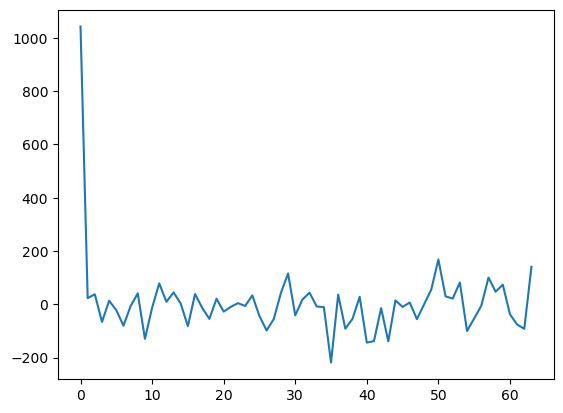

In [226]:
plt.plot(index1D, output1D)

#### Inverse 1D-DCT II Function

In [227]:
def idct(cof):
    N = len(cof)
    data = np.zeros(N)
    for k in range(N):
        s = 0
        for n in range(1, N):
            out = cof[n] * math.cos(math.pi/(2*N)*((2*k)+1)*n)
            s = s + out
        data[k] = (cof[0]/math.sqrt(N)) + (math.sqrt(2/N)*s)
        
    return np.around(data, decimals=7)

In [228]:
output1D_i = idct(output1D)
output1D_i

array([ 36.       , 189.       , 165.       ,   5.       , 221.       ,
       158.       ,  11.       , 211.       , 195.       , 125.       ,
       174.       , 142.       , 200.       , 192.       ,  12.       ,
       143.       ,  81.       , 245.       ,  42.       , 124.9999999,
       216.       ,  85.       , 237.       , 137.0000001, 106.       ,
        23.       , 186.       ,  96.       , 140.       ,   6.       ,
       179.       , 212.       , 167.       , 122.       , 143.       ,
       119.       , 247.       ,  14.       , 179.       , 106.       ,
       112.       ,  20.9999999,  86.       ,  47.       ,   7.       ,
       157.       , 221.0000001,  47.       , 243.       , 193.       ,
        71.       ,  39.9999999, 191.       , 171.       ,  76.       ,
       111.       , 176.       , 106.       , 163.       ,  53.       ,
       223.       , 142.       , 101.       , 190.       ])

In [229]:
o1D_i = fft.idct(output1D, norm='ortho') # Use SciPy
o1D_i

array([ 36.00000004, 189.        , 165.        ,   5.        ,
       221.00000004, 158.00000002,  10.99999997, 210.99999999,
       195.        , 125.00000001, 173.99999995, 141.99999996,
       200.00000002, 191.99999998,  12.00000002, 143.        ,
        80.99999997, 245.00000003,  41.99999999, 124.99999995,
       216.00000003,  85.        , 237.00000001, 137.00000005,
       105.99999998,  23.00000003, 185.99999996,  95.99999999,
       140.        ,   6.00000004, 178.99999998, 212.00000003,
       166.99999996, 122.        , 142.99999998, 118.99999998,
       246.99999998,  13.99999998, 178.99999999, 106.        ,
       112.00000002,  20.99999995,  86.00000001,  47.00000002,
         7.        , 156.99999997, 221.00000006,  47.00000002,
       243.00000001, 192.99999999,  71.00000002,  39.99999994,
       190.99999995, 171.00000004,  76.00000001, 111.00000001,
       176.00000001, 105.99999999, 163.        ,  53.00000001,
       223.00000004, 141.99999999, 101.00000003, 190.00

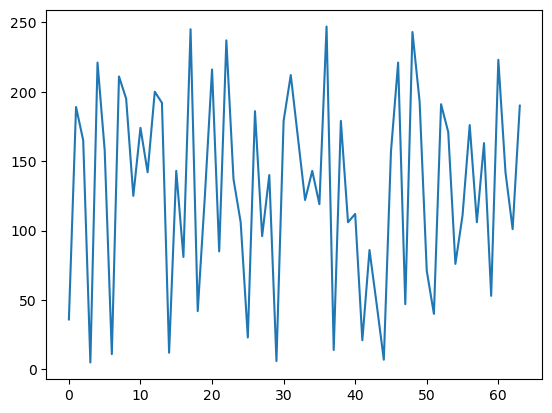

In [230]:
plt.plot(index1D, output1D_i)

In [243]:
cpath = os.getcwd()
cpath

'C:\\Personal\\Local\\Coding\\Projects\\C++\\DCT\\Lab'

In [256]:
wpath = os.chdir('C:\\Personal\\Local\\Coding\\Projects\\C++\\DCT\\OriginalImg')
cpath = os.getcwd()
cpath

'C:\\Personal\\Local\\Coding\\Projects\\C++\\DCT\\OriginalImg'

#### Read Grayscale Image

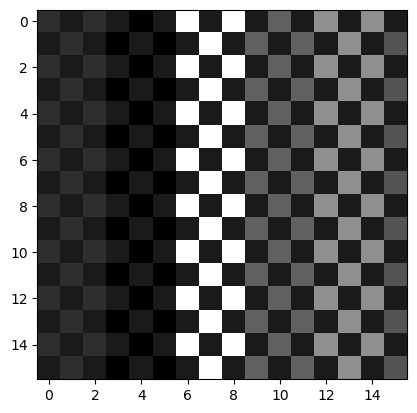

In [298]:
l1 = 'Grayscale'
path = os.path.join(cpath, l1)
imlist = os.listdir(path)
impath = os.path.join(path, imlist[0])

gArr = cv.imread(impath, cv.IMREAD_GRAYSCALE)
plt.imshow(gArr, cmap='gray')

#### Build 2D-DCT II Function

#### Inverse 2D-DCT II Function